In [29]:
import pandas as pd
from sklearn import preprocessing
from neupy import environment
from sklearn.model_selection import train_test_split
from neupy import environment, algorithms, layers, estimators
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

%matplotlib inline

### Approach and code taken from [here](http://neupy.com/apidocs/neupy.algorithms.rbfn.grnn.html) 

In [30]:
training_df = pd.read_csv("train_70.0.csv").iloc[:,3:]
training_X = training_df.loc[:,:' shares']
training_X.head(2)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,9.0,744.0,0.497970,1.0,0.689655,9.0,0.0,0.0,1.0,4.666667,...,0.1,0.8,-0.249621,-0.6,-0.083333,0.9,0.8,0.4,0.8,3800
1,12.0,623.0,0.503268,1.0,0.675603,5.0,4.0,9.0,0.0,4.715891,...,0.1,1.0,-0.235185,-0.7,-0.100000,0.1,0.2,0.4,0.2,1500


In [31]:
training_Y = training_df.iloc[:,-1:]
training_Y.head(2)

,shares
0,3800
1,1500


In [32]:
test_df = pd.read_csv("test_30.0.csv").iloc[:,3:]
testing_X = test_df.loc[:, :' shares']
testing_Y = test_df.loc[:, ' shares']

testing_X.head(2)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,1015.0,0.422018,1.0,0.545031,10.0,6.0,33.0,1.0,4.656158,...,0.100000,0.8,-0.160714,-0.50,-0.071429,0.0,0.0,0.5,0.0,2900
1,9.0,503.0,0.569697,1.0,0.737542,9.0,0.0,1.0,1.0,4.576541,...,0.136364,1.0,-0.157500,-0.25,-0.100000,0.0,0.0,0.5,0.0,1300


In [33]:
testing_Y.head(2)

0    2900
1    1300
Name:  shares, dtype: int64

In [34]:
testing_X.dtypes

 n_tokens_title                   float64
 n_tokens_content                 float64
 n_unique_tokens                  float64
 n_non_stop_words                 float64
 n_non_stop_unique_tokens         float64
 num_hrefs                        float64
 num_self_hrefs                   float64
 num_imgs                         float64
 num_videos                       float64
 average_token_length             float64
 num_keywords                     float64
 data_channel_is_lifestyle        float64
 data_channel_is_entertainment    float64
 data_channel_is_bus              float64
 data_channel_is_socmed           float64
 data_channel_is_tech             float64
 data_channel_is_world            float64
 kw_min_min                       float64
 kw_max_min                       float64
 kw_avg_min                       float64
 kw_min_max                       float64
 kw_max_max                       float64
 kw_avg_max                       float64
 kw_min_avg                       

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# for n in columns_to_scale:
for n in training_df.columns:
    training_X[n] = scaler.fit_transform(training_X[n].reshape(-1, 1))
    testing_X[n] = scaler.fit_transform(testing_X[n].reshape(-1, 1))
    
training_Y = scaler.fit_transform(training_X[' shares'].reshape(-1, 1))
testing_Y = scaler.fit_transform(testing_X[' shares'].reshape(-1, 1))

/home/lam/anaconda2/envs/neupy/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/lam/anaconda2/envs/neupy/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/home/lam/anaconda2/envs/neupy/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/lam/anaconda2/envs/neupy/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
/home/lam/anaconda2/envs/neupy/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated

In [36]:
training_X.iloc[:, :20].describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min
count,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04
mean,1.034448e-16,6.606127e-17,6.145234e-18,6.145234e-18,1.126626e-17,-1.536309e-17,-1.536309e-17,-3.635930e-17,1.574716e-17,4.000804e-16,1.830768e-16,7.195045e-17,3.072617e-17,-1.216244e-17,2.534909e-17,-1.792360e-17,-2.304463e-17,-3.559115e-17,-1.382678e-17,-1.070295e-16
std,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,-3.955223e+00,-1.169282e+00,-1.319704e-01,-1.611659e-01,-1.784229e-01,-9.678849e-01,-8.587478e-01,-5.468887e-01,-3.003397e-01,-5.375803e+00,-3.264444e+00,-2.359129e-01,-4.668046e-01,-4.326853e-01,-2.519992e-01,-4.774206e-01,-5.203083e-01,-3.868126e-01,-3.048287e-01,-4.969156e-01
25%,-6.607161e-01,-6.443250e-01,-2.018381e-02,-1.204752e-03,-1.801724e-02,-6.114061e-01,-5.982225e-01,-4.267044e-01,-3.003397e-01,-8.001540e-02,-6.460574e-01,-2.359129e-01,-4.668046e-01,-4.326853e-01,-2.519992e-01,-4.774206e-01,-5.203083e-01,-3.868126e-01,-1.873932e-01,-2.710931e-01
50%,-1.900723e-01,-2.893948e-01,-3.945246e-03,-1.204752e-03,-1.391169e-03,-2.549273e-01,-7.717183e-02,-4.267044e-01,-3.003397e-01,1.372914e-01,-1.223801e-01,-2.359129e-01,-4.668046e-01,-4.326853e-01,-2.519992e-01,-4.774206e-01,-5.203083e-01,-3.868126e-01,-1.312967e-01,-1.237429e-01
75%,7.512154e-01,3.630817e-01,1.262313e-02,-1.204752e-03,1.496480e-02,2.797909e-01,1.833535e-01,-6.615122e-02,-6.102349e-02,3.633936e-01,9.249746e-01,-2.359129e-01,-4.668046e-01,-4.326853e-01,-2.519992e-01,-4.774206e-01,-5.203083e-01,-3.146069e-01,-4.269579e-02,6.725603e-02
max,5.928298e+00,1.410122e+01,1.664915e+02,1.665183e+02,1.664498e+02,2.612450e+01,2.936219e+01,1.483671e+01,2.147744e+01,4.130836e+00,1.448652e+00,4.238853e+00,2.142224e+00,2.311149e+00,3.968266e+00,2.094589e+00,1.921937e+00,5.071943e+00,7.791563e+01,6.250750e+01


In [37]:
training_X.iloc[:, 21:40].describe()

,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02
count,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04
mean,4.455295e-17,-4.916188e-17,-2.355673e-17,7.476702e-17,-9.678744e-17,1.133028e-17,3.098222e-17,2.944592e-18,1.664334e-18,1.211123e-16,1.536309e-17,5.223449e-17,1.126626e-17,8.193646e-18,2.202042e-17,-2.355673e-17,-1.743710e-16,-5.377080e-17,-6.606127e-17
std,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,-3.530775e+00,-1.927846e+00,-9.855136e-01,-9.154066e-01,-2.355835e+00,-2.114493e-01,-2.463818e-01,-2.715480e-01,-4.525985e-01,-4.783309e-01,-4.792975e-01,-4.706933e-01,-4.112301e-01,-2.577719e-01,-2.714934e-01,-3.881860e-01,-7.034875e-01,-6.451941e-01,-7.662924e-01
25%,4.211205e-01,-6.390002e-01,-9.846335e-01,-3.398842e-01,-5.664062e-01,-1.761761e-01,-2.202376e-01,-2.290611e-01,-4.525985e-01,-4.783309e-01,-4.792975e-01,-4.706933e-01,-4.112301e-01,-2.577719e-01,-2.714934e-01,-3.881860e-01,-6.079926e-01,-5.314007e-01,-6.650683e-01
50%,4.211205e-01,-1.105219e-01,-7.562646e-02,-2.123717e-01,-2.008446e-01,-1.453120e-01,-1.798329e-01,-1.766534e-01,-4.525985e-01,-4.783309e-01,-4.792975e-01,-4.706933e-01,-4.112301e-01,-2.577719e-01,-2.714934e-01,-3.881860e-01,-5.761795e-01,-4.934824e-01,-6.245663e-01
75%,4.211205e-01,5.312089e-01,8.223448e-01,5.576551e-02,3.448509e-01,-6.815178e-02,-5.861879e-02,-4.940829e-02,-4.525985e-01,-4.783309e-01,-4.792975e-01,-4.706933e-01,-4.112301e-01,-2.577719e-01,-2.714934e-01,-3.881860e-01,2.199732e-01,4.468763e-02,4.147575e-01
max,4.211205e-01,4.351808e+00,2.195068e+00,4.726025e+01,2.587878e+01,3.783955e+01,1.979673e+01,2.950811e+01,2.209464e+00,2.090603e+00,2.086387e+00,2.124526e+00,2.431728e+00,3.879399e+00,3.683331e+00,2.576085e+00,2.830838e+00,3.567643e+00,2.493114e+00


In [38]:
training_X.iloc[:, 41:].describe()

,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04,2.775000e+04
mean,8.040015e-17,2.984279e-16,1.446691e-17,1.817325e-16,-2.122666e-16,3.447733e-16,1.173996e-16,1.597761e-16,-3.231369e-16,3.592082e-16,-8.116831e-17,1.958793e-17,7.246256e-17,-8.961800e-18,8.193646e-18,-9.217852e-17,7.393485e-17,1.635529e-17
std,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,-8.097722e-01,-3.802284e+00,-5.300707e+00,-2.280890e+00,-1.543111e+00,-3.585024e+00,-1.844727e+00,-3.379258e+00,-1.348732e+00,-3.051733e+00,-5.778505e+00,-1.647367e+00,-9.236829e+00,-8.702146e-01,-4.014559e+00,-1.816698e+00,-6.885182e-01,-3.087629e-01
25%,-7.111149e-01,-4.021992e-01,-6.330887e-01,-6.463869e-01,-6.481381e-01,-4.316234e-01,-6.576720e-01,-4.517814e-01,-6.378517e-01,-6.333119e-01,-5.323186e-01,-6.128440e-01,-1.784751e-01,-8.702146e-01,-2.659758e-01,-9.320832e-01,-6.885182e-01,-2.221488e-01
50%,-6.688256e-01,8.817498e-02,-1.827611e-03,-3.035204e-02,-1.184606e-01,1.492662e-01,-5.367061e-02,4.754101e-02,7.302890e-02,1.728285e-01,4.851900e-02,7.683772e-02,8.033497e-02,-4.336572e-01,-2.659758e-01,8.371472e-01,-6.885182e-01,-1.806730e-01
75%,5.711956e-01,5.530251e-01,6.026144e-01,6.128189e-01,4.803053e-01,6.195101e-01,6.124765e-01,5.471467e-01,7.302890e-02,9.789690e-01,5.642801e-01,7.665195e-01,5.979552e-01,6.705763e-01,2.803376e-01,8.371472e-01,4.110489e-01,-5.249147e-02
max,2.391560e+00,4.772566e+00,5.536088e+00,6.672846e+00,1.566978e+01,1.670644e+00,4.565369e+00,6.180725e+00,1.286888e+01,9.789690e-01,2.028000e+00,1.801042e+00,1.115575e+00,2.211367e+00,3.482608e+00,8.371472e-01,3.709750e+00,6.290293e+01


In [39]:
training_Y

array([[ 0.03906674],
       [-0.17151714],
       [-0.21967676],
       ..., 
       [-0.20814043],
       [-0.17151714],
       [-0.2329527 ]])

In [40]:
testing_X.head(2)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0.772333,1.009830,-0.804651,0.173866,-0.836730,-0.080937,0.696596,3.437189,-0.060424,0.125778,...,0.043472,0.178883,0.774215,0.072701,0.383619,-0.872194,-0.276462,0.839173,-0.692434,-0.041667
1,-0.663972,-0.074095,0.276844,0.173866,0.419748,-0.167244,-0.844332,-0.426111,-0.060424,0.031097,...,0.538021,0.988442,0.799556,0.931878,0.074571,-0.872194,-0.276462,0.839173,-0.692434,-0.163575


In [41]:
testing_Y

array([[-0.04166705],
       [-0.16357486],
       [ 1.08598017],
       ..., 
       [-0.1711941 ],
       [-0.22163345],
       [-0.11785943]])

### <font color=blue>My GRNN</font>

In [42]:
def generate_rmse_curves_testing_training_data(hyperparameter_values, validation_rmse, training_rmse, title_text, x_label_text):
    plt.figure()
    plt.xlabel(x_label_text)
    plt.ylabel("RMSE")
    plt.plot(hyperparameter_values, validation_rmse)
    plt.legend(['Test data'])    

In [43]:
result = []
rmse_training = []
rmse_testing = []
for s in tqdm(np.arange(0.55, 1, 5e-2)):
    grnnet = algorithms.GRNN(std=s, verbose=False)
    grnnet.train(training_X, training_Y)
    p_result = grnnet.predict(testing_X)
    result.append([s, estimators.rmsle(p_result, testing_Y)])
    rmse_testing.append(estimators.rmse(p_result, testing_Y))
        
results = pd.DataFrame(result, columns=['std', 'RMSLE'])
results = results.sort_values('RMSLE', ascending=1)
results.head(5)

100%|██████████| 9/9 [17:11<00:00, 114.60s/it]


,std,RMSLE
0,0.55,NaN
1,0.60,NaN
2,0.65,NaN
3,0.70,NaN
4,0.75,NaN


#### <font color=blue>std 0.55 to 1</font>

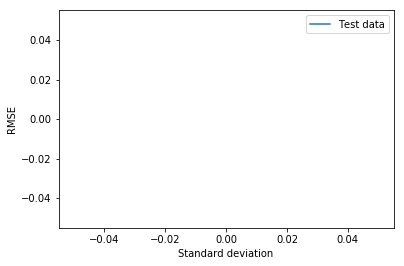

In [44]:
generate_rmse_curves_testing_training_data(np.arange(0.55, 1, 5e-2), rmse_testing, rmse_training, "RMSE with standard deviation", "Standard deviation")

#### <font color=blue>std 0.05 to 0.5</font>

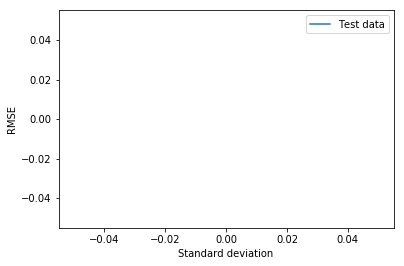

In [45]:
generate_rmse_curves_testing_training_data(np.arange(5e-2, 0.5, 5e-2), rmse_testing, rmse_training, "RMSE with standard deviation", "Standard deviation")

### NeuPy imports

In [46]:
environment.reproducible()

#### Get the RMSE for different values of STD

In [47]:
std_values = [0.1 + 0.1 * x for x in range(5)]
rmse_training = []
rmse_testing = []
for std_value in tqdm(std_values):
    nw = algorithms.GRNN(std=std_value, verbose=True)
    nw.train(training_X, training_Y)
    testing_Y_predicted = nw.predict(testing_X)
    rmse_testing.append(estimators.rmse(testing_Y_predicted, testing_Y))

  0%|          | 0/5 [00:00<?, ?it/s]


Main information

[ALGORITHM] GRNN

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] std = 0.1



 20%|██        | 1/5 [01:55<07:42, 115.66s/it]


Main information

[ALGORITHM] GRNN

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] std = 0.2



 40%|████      | 2/5 [03:51<05:47, 115.75s/it]


Main information

[ALGORITHM] GRNN

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] std = 0.30000000000000004



 60%|██████    | 3/5 [05:49<03:53, 116.56s/it]


Main information

[ALGORITHM] GRNN

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] std = 0.4



 80%|████████  | 4/5 [07:49<01:57, 117.28s/it]


Main information

[ALGORITHM] GRNN

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] std = 0.5



100%|██████████| 5/5 [09:47<00:00, 117.41s/it]


#### Generate the validation curves

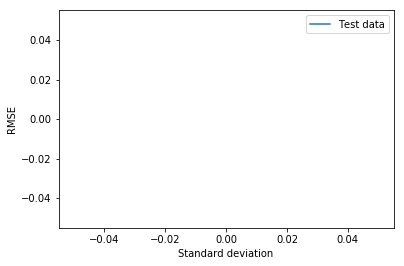

In [48]:
generate_rmse_curves_testing_training_data(std_values, rmse_testing, rmse_training, "RMSE with standard deviation", "Standard deviation")

#### Check the RMSE for the best candidate Standard deviation

In [49]:
nw = algorithms.GRNN(std=0.3, verbose=False)
nw.train(training_X, training_Y)
y_predicted = nw.predict(testing_X)
print(estimators.rmse(y_predicted, testing_Y))

nan


In [50]:
nw = algorithms.GRNN(std=0.25, verbose=False)
nw.train(training_X, training_Y)
y_predicted = nw.predict(testing_X)
print(estimators.rmse(y_predicted, testing_Y))

nan


In [51]:
nw = algorithms.GRNN(std=0.65, verbose=False)
nw.train(training_X, training_Y)
y_predicted = nw.predict(testing_X)
print(estimators.rmse(y_predicted, testing_Y))

nan


### Invert the target values using [this](https://stackoverflow.com/questions/41551165/invert-minmaxscaler-from-scikit-learn)

In [52]:
y_predicted_upscaled = scaler.inverse_transform(y_predicted)
testing_Y_upscaled = scaler.inverse_transform(testing_Y)

### Check the predicted values

In [53]:
slice = 100
for itr in range(slice):
    print("#{0}. Diff={1}".format(itr, abs(y_predicted_upscaled[itr] - testing_Y_upscaled[itr])))

#0. Diff=[ 0.20519]
#1. Diff=[ 0.03921039]
#2. Diff=[ 1.11100432]
#3. Diff=[ 0.07181013]
#4. Diff=[ 0.05348331]
#5. Diff=[ 0.19575296]
#6. Diff=[ 0.02274353]
#7. Diff=[ 0.24757831]
#8. Diff=[ 0.00857691]
#9. Diff=[ 0.0015231]
#10. Diff=[ 0.12992895]
#11. Diff=[ 0.12638554]
#12. Diff=[ 1.27427208]
#13. Diff=[ 1.28835956]
#14. Diff=[ 0.09778768]
#15. Diff=[ 0.07354383]
#16. Diff=[ 0.16213276]
#17. Diff=[ 0.01920544]
#18. Diff=[ 0.04076442]
#19. Diff=[ 0.04043461]
#20. Diff=[ 0.16278003]
#21. Diff=[ 0.25028499]
#22. Diff=[ 0.11143517]
#23. Diff=[ 0.19226289]
#24. Diff=[ 0.01112243]
#25. Diff=[ 0.04077156]
#26. Diff=[ 0.20668579]
#27. Diff=[ 0.05217442]
#28. Diff=[ 0.19574083]
#29. Diff=[ 0.00655935]
#30. Diff=[ 0.01744817]
#31. Diff=[ 0.00654523]
#32. Diff=[ 0.07504252]
#33. Diff=[ 0.12827096]
#34. Diff=[ 0.0026266]
#35. Diff=[ 0.09123315]
#36. Diff=[ 0.03965395]
#37. Diff=[ 0.06962363]
#38. Diff=[ 0.04091821]
#39. Diff=[ 0.36084148]
#40. Diff=[ 0.05294627]
#41. Diff=[ 0.83516396]
#42. Di

### <font color= blue>MLP</font>

In [54]:
from sklearn.neural_network import MLPRegressor

result = []
for thisactivation in tqdm(['tanh', 'relu', 'logistic']):
    for thisalpha in [0.0001, 1.0, 100]:
        for sz in [10, 50, 100, 200]:
            mlpreg = MLPRegressor(hidden_layer_sizes= [sz,sz,sz],
                                 activation=thisactivation,
                                 alpha=thisalpha, solver='lbfgs').fit(training_X, training_Y)
            
            
            result.append([sz, thisalpha, thisactivation, 
                           estimators.rmse(mlpreg.predict(testing_X), testing_Y)])

# The coefficient R^2 is defined as (1 - u/v), 
# where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and 
# v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). 
# The best possible score is 1.0 and it can be negative (because the model 
# can be arbitrarily worse). A constant model that always predicts the 
# expected value of y, disregarding the input features, would get a R^2 score of 0.0.

results = pd.DataFrame(result, columns=['size x size', 'alpha', 'activation', 'RMSE'])

  0%|          | 0/3 [00:00<?, ?it/s]/home/lam/anaconda2/envs/neupy/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
100%|██████████| 3/3 [23:01<00:00, 460.55s/it]


#### <font color=blue>3 hidden layers, max 200 neurons</font>

In [55]:
results = results.sort_values(by=['RMSE'], ascending=[1])
results.head(5)

,size x size,alpha,activation,RMSE
20,10,100.0000,relu,0.003656
21,50,100.0000,relu,0.003793
22,100,100.0000,relu,0.006982
23,200,100.0000,relu,0.023950
15,200,0.0001,relu,0.033164


#### <font color=blue>4 hidden layers results, max 100 neurons</font>

In [57]:
results = results.sort_values(by=['RMSE'], ascending=[1])
results.head(5)

,size x size,alpha,activation,RMSE
20,10,100.0000,relu,0.003656
21,50,100.0000,relu,0.003793
22,100,100.0000,relu,0.006982
23,200,100.0000,relu,0.023950
15,200,0.0001,relu,0.033164


#### <font color=blue> 3 hidden layers results, max 100 neurons</font>

In [58]:
results = results.sort_values(by=['RMSE'], ascending=[1])
results.head(5)

,size x size,alpha,activation,RMSE
20,10,100.0000,relu,0.003656
21,50,100.0000,relu,0.003793
22,100,100.0000,relu,0.006982
23,200,100.0000,relu,0.023950
15,200,0.0001,relu,0.033164


### MLFF BP with conjugate gradient

In [59]:
environment.reproducible()
from neupy import algorithms, layers

cgnet = algorithms.ConjugateGradient(
    connection=[
        layers.Input(training_X.shape[1]),
        layers.Sigmoid(50),
        layers.Sigmoid(1),
    ],
    search_method='golden',
    show_epoch=1,
    verbose=True,
    addons=[algorithms.LinearSearch],
)


Main information

[ALGORITHM] ConjugateGradient

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = ['LinearSearch']
[OPTION] update_function = fletcher_reeves
[OPTION] maxiter = 10
[OPTION] search_method = golden
[OPTION] tol = 0.1

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 1.68 seconds


#### Note: table below shows MSE - need to take sqrt to get the RMSE


Start training

[TRAINING DATA] shapes: (27750, 59)
[TEST DATA] shapes: (11894, 59)
[TRAINING] Total epochs: 5

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |     0.99648 |       0.997 |      875 ms |
|           2 |     0.89234 |     0.91326 |       1 sec |
|           3 |     0.83007 |     0.86175 |       1 sec |
|           4 |     0.82233 |     0.85312 |      928 ms |
|           5 |      0.8169 |     0.84817 |       1 sec |
---------------------------------------------------------



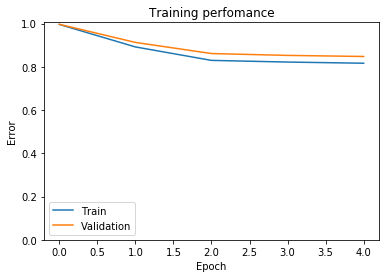

In [60]:
cgnet.train(training_X, training_Y, testing_X, testing_Y, epochs=5)
from neupy import plots
plots.error_plot(cgnet)

In [61]:
from neupy.estimators import rmsle

y_predict = cgnet.predict(testing_X).round(3)

# Root mean square logarithmic error
error = rmsle(scaler.inverse_transform(testing_Y), scaler.inverse_transform(y_predict))
print(error)

0.20992865410911177


In [62]:
from neupy.estimators import rmse

error = rmse(scaler.inverse_transform(testing_Y), scaler.inverse_transform(y_predict))
print(error)

0.9209532081880764


In [63]:
def print_abs_difference_of_predictions(data_scaler, actual_values, predicted_values, slice = 100):
    print(actual_values.shape)
    print(predicted_values.shape)
    actual_values_upscaled = data_scaler.inverse_transform(actual_values)
    predicted_values_upscaled = data_scaler.inverse_transform(predicted_values)

    for itr in range(slice):
        print("#{0}. Diff={1}".format(itr, abs(predicted_values_upscaled[itr] - actual_values_upscaled[itr])))

### SOM using [Neupy](http://neupy.com/apidocs/neupy.algorithms.competitive.sofm.html)

In [64]:
num_epochs = 100
num_clusters = 30
num_features = training_X.shape[1]

In [65]:
# n_inputs is the number of features

sofm = algorithms.SOFM(n_inputs=num_features, n_outputs=num_clusters, step=0.1, learning_radius=0, verbose=True, grid_type='rect')
sofm.train(training_X, epochs=num_epochs)
print(sofm.weight.shape)


Main information

[ALGORITHM] SOFM

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] n_inputs = 59
[OPTION] distance = euclid
[OPTION] features_grid = None
[OPTION] grid_type = rect
[OPTION] learning_radius = 0
[OPTION] n_outputs = 30
[OPTION] reduce_radius_after = 100
[OPTION] reduce_std_after = 100
[OPTION] reduce_step_after = 100
[OPTION] std = 1
[OPTION] weight = Normal(mean=0, std=0.01)


Start training

[TRAINING DATA] shapes: (27750, 59)
[TRAINING] Total epochs: 100

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |     0.44814 |           - |       5 sec |
|           2 |     0.44851 |           - |       5 sec |
|           3 |     0.44834 |           - |       5 sec |
|           4 |     0.44794 |           - |     

#### Get the predictions for the training set and then get the average of the number of shares for the clusters

In [66]:
trainingX_predictions = sofm.predict(training_X)
cluster_sums = np.zeros(num_clusters)
cluster_counts = np.zeros(num_clusters)
for idx, prediction in enumerate(trainingX_predictions):
    predicted_label = np.argmax(prediction)
    cluster_sums[predicted_label] += training_Y[idx]
    cluster_counts[predicted_label] += 1

#print(cluster_counts)
cluster_averages = cluster_sums/(1+cluster_counts)
print(cluster_averages)

[ -1.43213494e-01   3.32609461e-02   5.82208947e-02   1.62145091e-02
   1.15669491e-01   3.18439214e-01   1.48134220e-01  -2.94372953e-02
   6.34181744e-02  -2.46751716e-03   1.03431751e-01   9.68163576e-03
  -5.44474239e-03  -6.08135529e-02  -2.51063734e-02  -8.53507146e-02
  -4.66830972e-02  -3.19961432e-02   1.23176489e+00   2.81675364e+01
  -1.07334154e-02  -4.64782429e-02   9.73415179e-02   1.67033173e-01
  -1.11779486e-01   5.50176511e-02  -9.54155711e-02  -3.50685071e-02
   1.60071422e-01   2.81578063e-01]


#### Get the predictions for the test data

In [67]:
testing_X_predictions = sofm.predict(testing_X)
square_error = 0
predicted_values = []

for idx, prediction in enumerate(testing_X_predictions):
    predicted_label = np.argmax(prediction)
    predicted_shares = cluster_averages[predicted_label]
    predicted_values.append(predicted_shares)
    actual_shares = testing_Y[idx]
    square_error += (predicted_shares-actual_shares)**2

rmse = math.sqrt(square_error/len(testing_X))
print("RMSE: " + str(rmse))

RMSE: 0.6678572613843193


In [ ]:
print_abs_difference_of_predictions(scaler, testing_Y, np.array(predicted_values).reshape(-1, 1), 30)